In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])

In [4]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23888000  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [5]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'flatten',
 'dense',
 'dense_1']

In [6]:
model.layers

In [7]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [8]:
layer_outputs = [layer.output for layer in model.layers[1:]]

In [9]:
visualize_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)

In [10]:
img=load_img('test/unhealthy/1000u.jpg', target_size=(224,224))

In [11]:
x=img_to_array(img)

In [12]:
x.shape

(224, 224, 3)

In [13]:
x=x.reshape((1,224,224,3))
print(x.shape)

(1, 224, 224, 3)


In [14]:
x=x/255

In [15]:
feature_maps = visualize_model.predict(x)
print(len(feature_maps))

6


In [16]:
layer_names = [layer.name for layer in model.layers]
print(layer_names) 

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 111, 111, 32)
(1, 109, 109, 64)
(1, 54, 54, 64)
(1, 186624)
(1, 128)
(1, 1)


<ipython-input-18-6e1261b1f6a2>:12: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


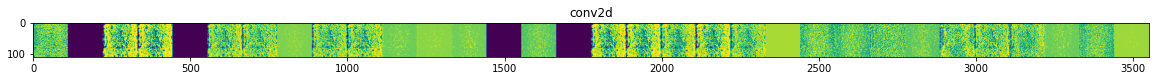

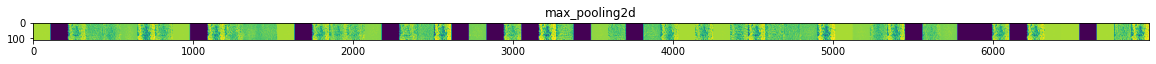

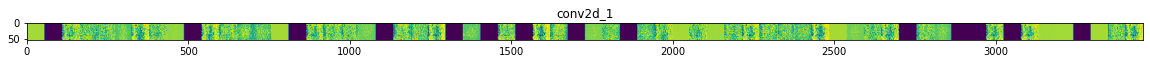

In [18]:
#plotting the graph

for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 112
      x += 224
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)  
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')